In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import optimizers
from keras import losses
from keras import metrics

In [2]:
from keras.datasets import fashion_mnist

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
X_train, X_test = X_train / 255., X_test / 255.

In [6]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    #Dense(784, activation='relu'),
    Dense(128, activation='relu'),
    #Dense(1024, activation='sigmoid'),
    Dense(10, activation='softmax'),
])

In [7]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
x_val = X_train[:10000]
partial_x_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=784,
    validation_data=(x_val, y_val)
)

Epoch 1/30
77/77 [==============================] - 3s 20ms/step - loss: 0.7916 - accuracy: 0.7413 - val_loss: 0.5292 - val_accuracy: 0.8259
Epoch 2/30
77/77 [==============================] - 1s 13ms/step - loss: 0.4851 - accuracy: 0.8363 - val_loss: 0.4536 - val_accuracy: 0.8468
Epoch 3/30
77/77 [==============================] - 1s 13ms/step - loss: 0.4403 - accuracy: 0.8493 - val_loss: 0.4165 - val_accuracy: 0.8604
Epoch 4/30
77/77 [==============================] - 1s 13ms/step - loss: 0.4086 - accuracy: 0.8596 - val_loss: 0.3918 - val_accuracy: 0.8677
Epoch 5/30
77/77 [==============================] - 1s 14ms/step - loss: 0.3878 - accuracy: 0.8658 - val_loss: 0.3688 - val_accuracy: 0.8702
Epoch 6/30
77/77 [==============================] - 1s 15ms/step - loss: 0.3674 - accuracy: 0.8729 - val_loss: 0.3573 - val_accuracy: 0.8761
Epoch 7/30
77/77 [==============================] - 1s 13ms/step - loss: 0.3547 - accuracy: 0.8757 - val_loss: 0.3378 - val_accuracy: 0.8823
Epoch 8/30
77

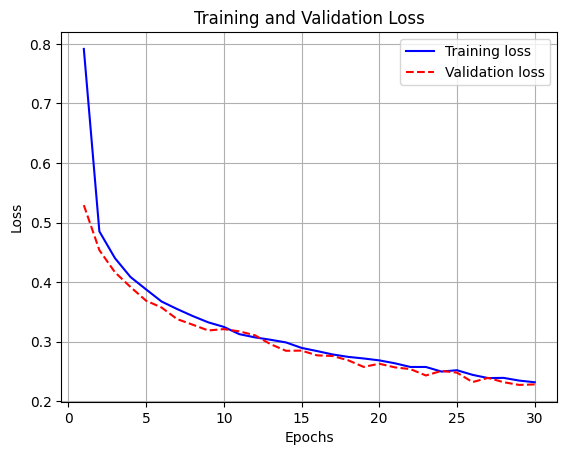

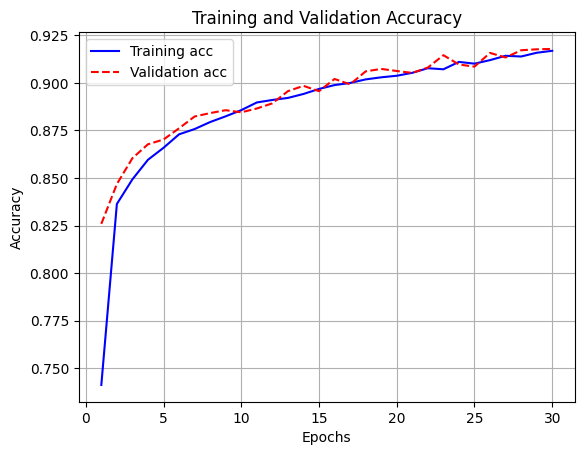

In [18]:
plt.plot(epochs, history_dict['loss'], 'b-', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'r--', label='Validation loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)  # Add grid lines
plt.show()

plt.clf()

# Plot training and validation accuracy
plt.plot(epochs, history_dict['accuracy'], 'b-', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'r--', label='Validation acc')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)  # Add grid lines
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3381 - accuracy: 0.8810
